## kaggle_titanic_accuracy_0.77

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as plot

## load train and test data

In [2]:
df = pd.read_csv('train_titanic.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
test_df= pd.read_csv('test_titanic.csv')

In [6]:
test_df.shape

(418, 11)

In [7]:
main_df=pd.concat([df.drop('Survived',axis=1),test_df],axis=0)

In [8]:
main_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Analysis

In [9]:
data =df
df['Died']= 1 - data['Survived']

<AxesSubplot:>

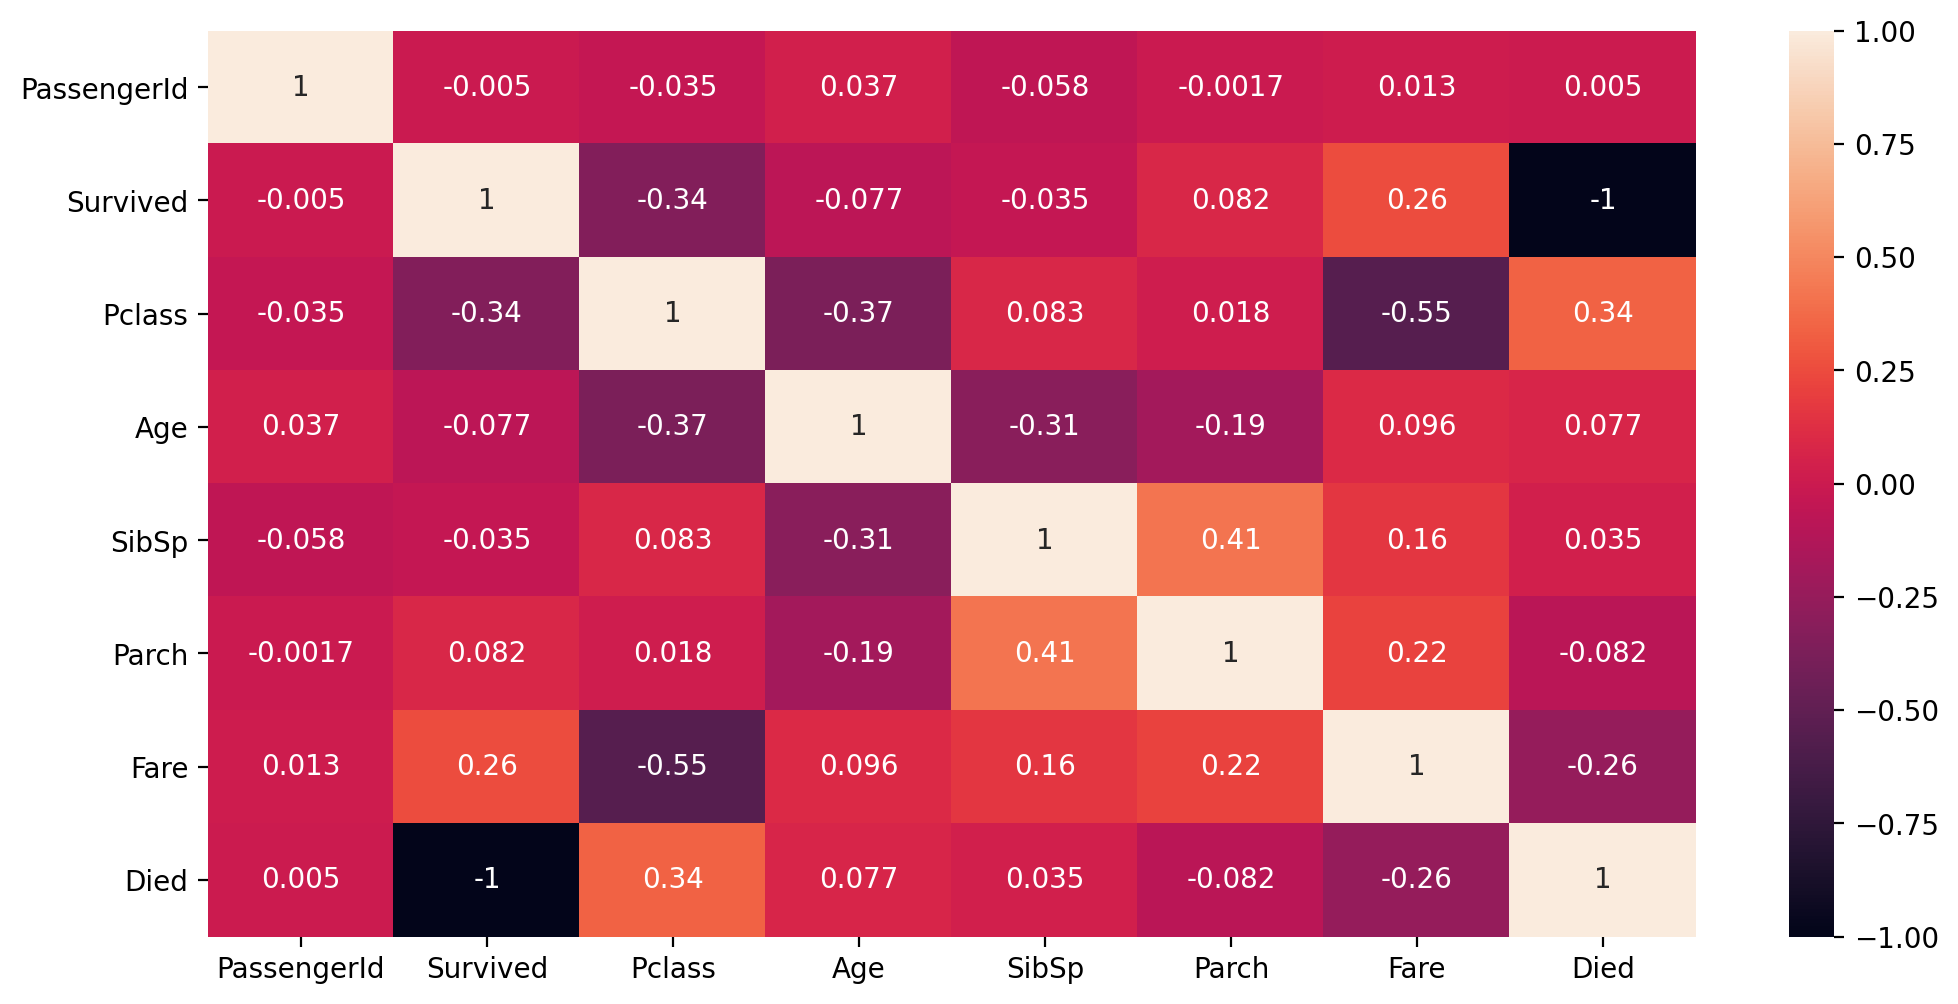

In [10]:
plt.figure(figsize=(12,6),dpi=200)
sns.heatmap(data.corr(),annot=True)

<AxesSubplot:xlabel='Sex'>

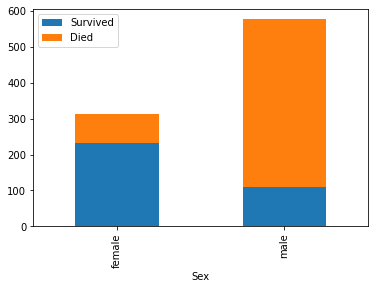

In [11]:
df.groupby('Sex').agg('sum')[['Survived','Died']].plot(kind='bar',stacked=True)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

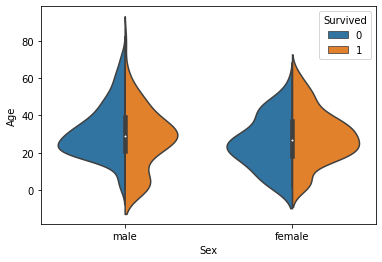

In [12]:
sns.violinplot(x='Sex', y='Age', hue='Survived',data=df,split=True)

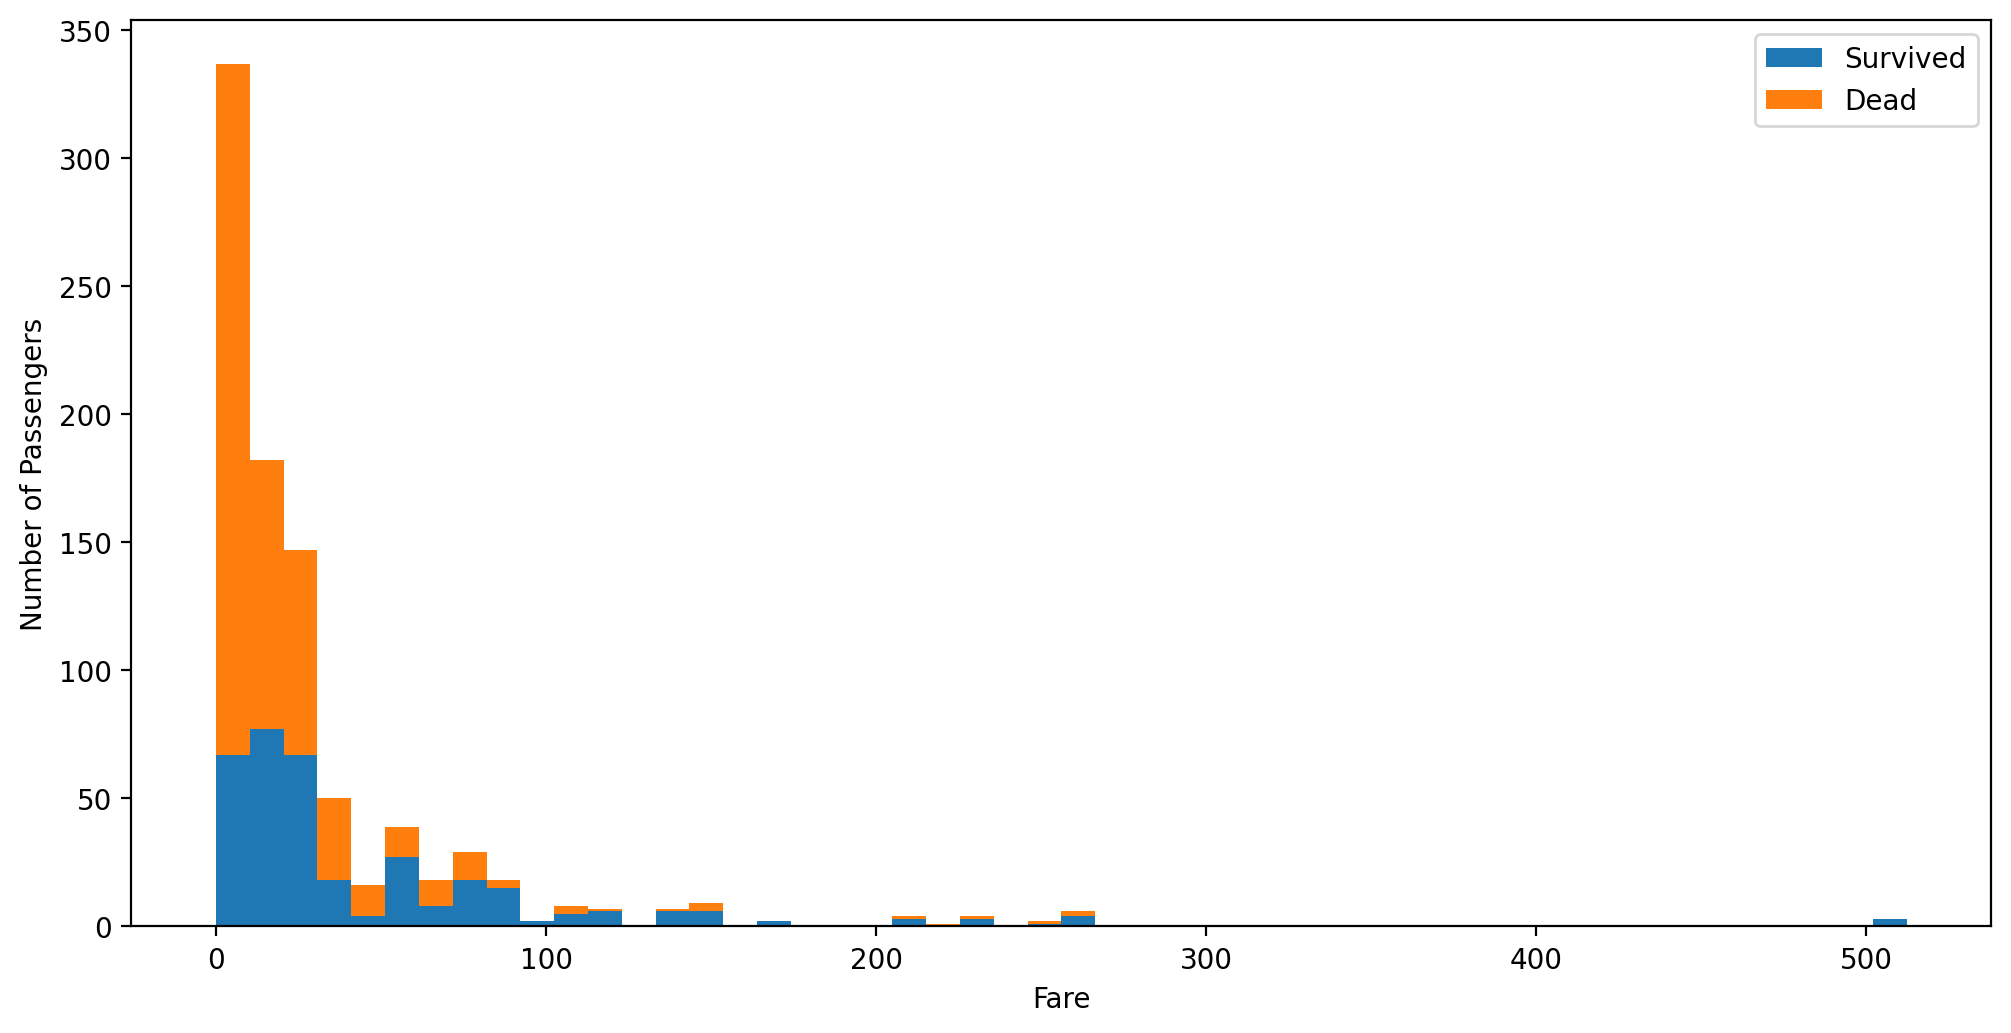

In [13]:
#Check the Fare ticket of each passagener and see how it impact the survival.
# graph says passengers with cheaper ticket fares are more likely to die.
figure = plt.figure(figsize=(12,6),dpi=200)
plt.hist([data[data['Survived'] == 1]['Fare'], data[data['Survived'] == 0]['Fare']], 
         stacked=True,
         bins = 50, label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of Passengers')
plt.legend();

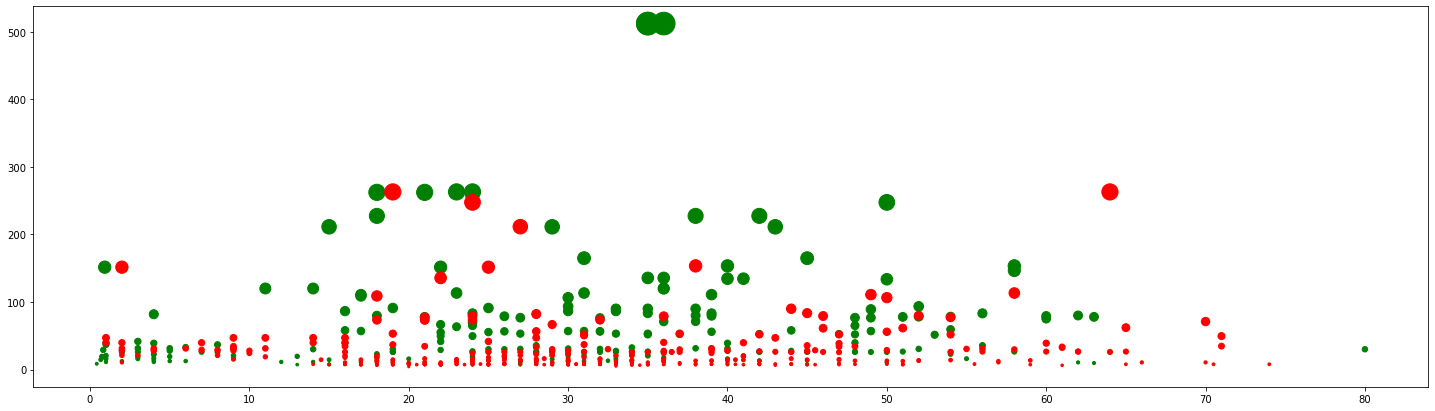

In [14]:
#combining age, fare and survival in one chart.

plt.figure(figsize=(25, 7))
ax = plt.subplot()

ax.scatter(data[data['Survived'] == 1]['Age'], data[data['Survived'] == 1]['Fare'], 
           c='green', s=data[data['Survived'] == 1]['Fare'])
ax.scatter(data[data['Survived'] == 0]['Age'], data[data['Survived'] == 0]['Fare'], 
           c='red', s=data[data['Survived'] == 0]['Fare']);


Size of the circles is proportional to the ticket fare. X-axis = AGE Y-axis = Ticket_Fare Green = Survived Red = Died

Small green dots between x=0 & x=7 : Children who were saved Small red dots between x=10 & x=45 : adults who died and from a lower classes Large green dots between x=20 & x=45 : Adults with larger ticket fares who are sruvived

<AxesSubplot:xlabel='Pclass', ylabel='Average fare'>

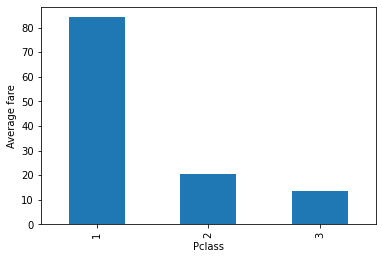

In [15]:
#ticket fare versues class
ax = plt.subplot()
ax.set_ylabel('Average fare')
data.groupby('Pclass').mean()['Fare'].plot(kind='bar',ax=ax)

## Feature Engineering

In [16]:
# creating function for checking percentage of null

def percent_null(df):
    percent_nan=df.isnull().sum()/len(main_df)*100
    percent_nan=percent_nan[percent_nan>0].sort_values()
    return percent_nan

<AxesSubplot:>

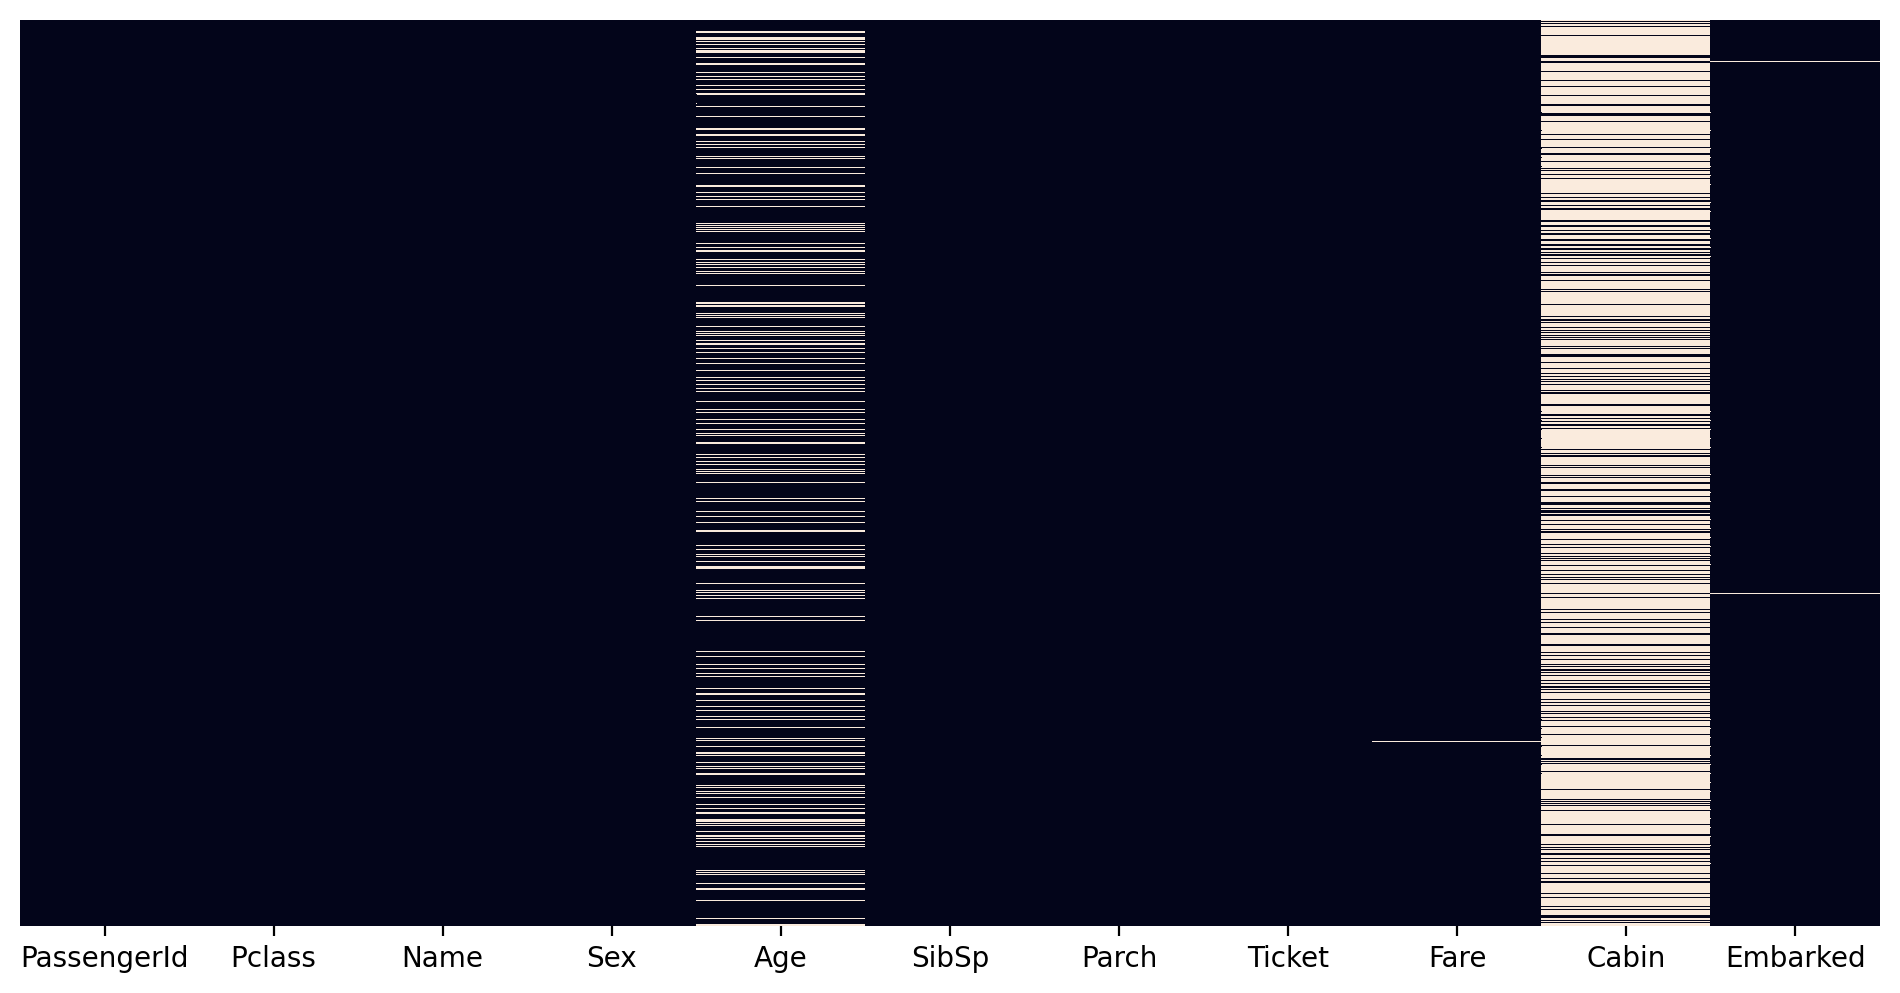

In [17]:
plt.figure(figsize= (12,6),dpi=
           200)
sns.heatmap(main_df.isnull(),yticklabels=False,cbar=False)

(0.0, 1.0)

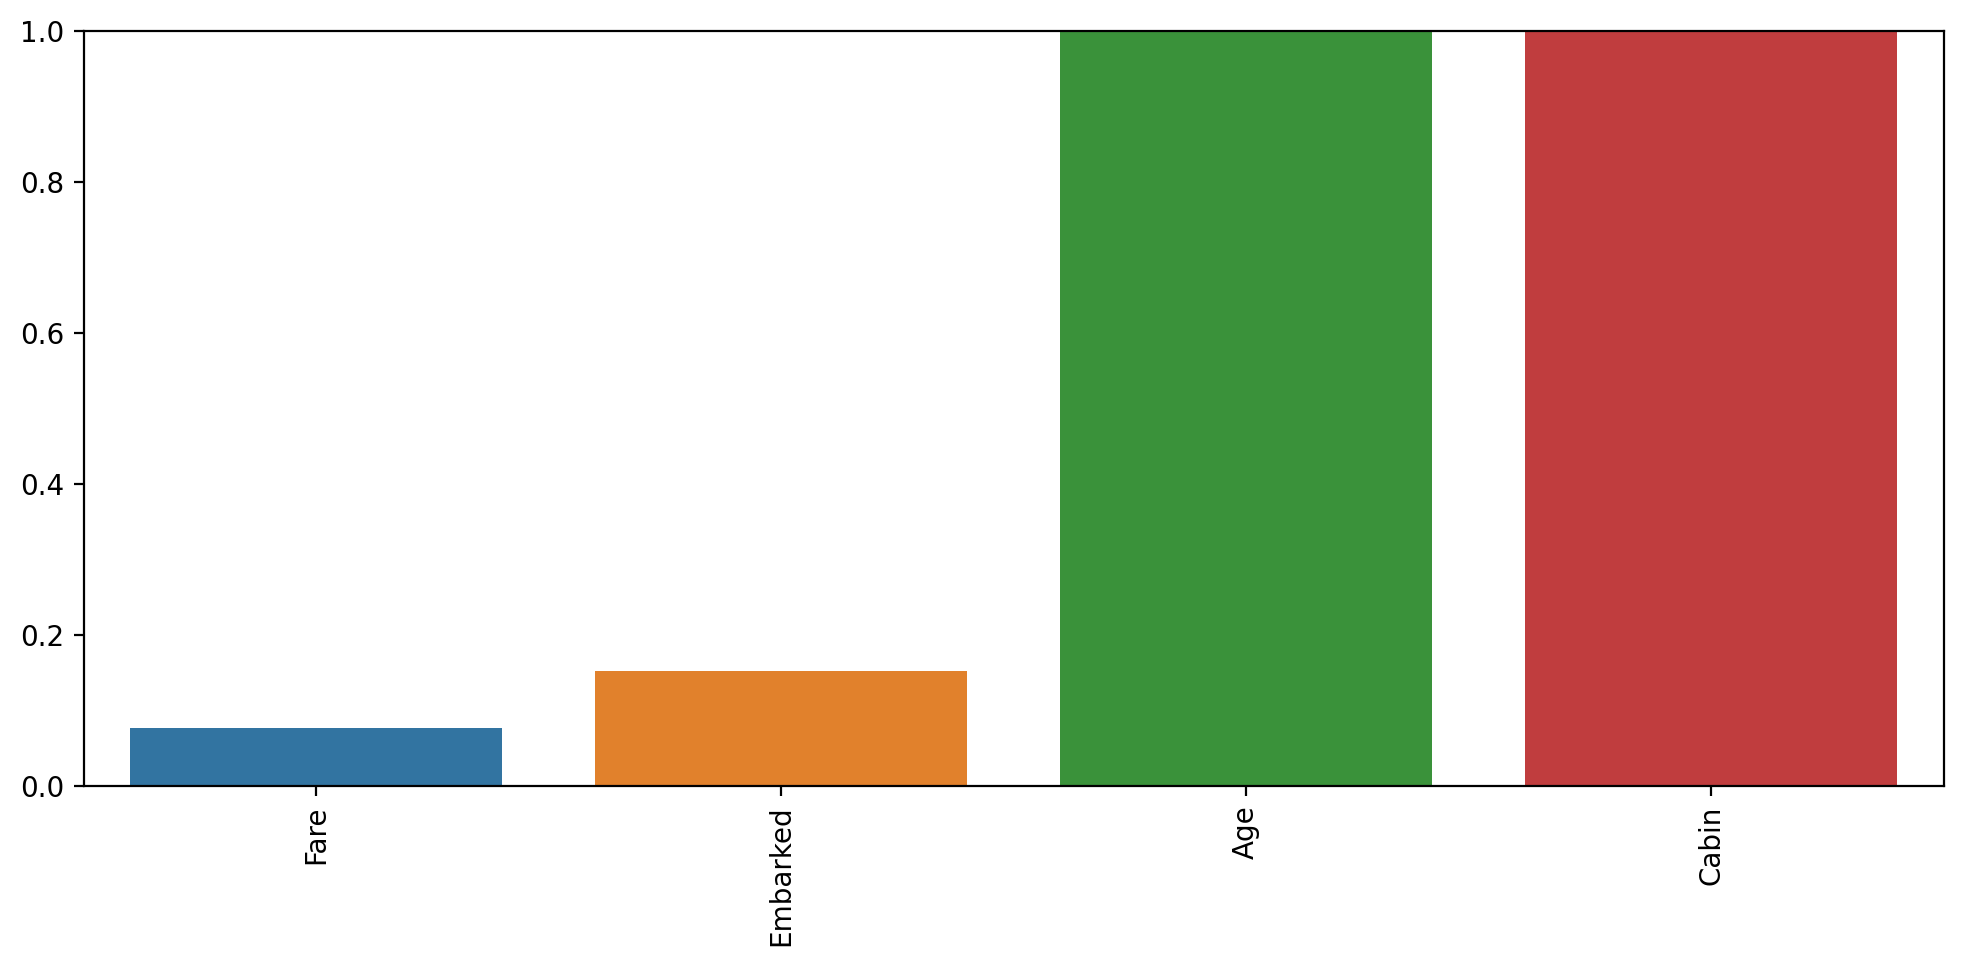

In [18]:
percent_nan=percent_null(main_df)
plt.figure(figsize=(12,5),dpi=200)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);
plt.ylim((0,1))

In [19]:
def process_family():
    
    global main_df
    # introducing a new feature : the size of families (including the passenger)
    main_df['FamilySize'] = main_df['Parch'] + main_df['SibSp'] + 1
    
    # introducing other features based on the family size
    main_df['Singleton'] = main_df['FamilySize'].map(lambda s: 1 if s == 1 else 0)
    main_df['SmallFamily'] = main_df['FamilySize'].map(lambda s: 1 if 2 <= s <= 4 else 0)
    main_df['LargeFamily'] = main_df['FamilySize'].map(lambda s: 1 if 5 <= s else 0)    
    return main_df

In [20]:
main_df = process_family()

In [21]:
main_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Singleton,SmallFamily,LargeFamily
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0,1,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0,1,0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0,1,0
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,0,0


In [22]:
def process_cabin():
      
  
    global main_df    
    # replacing missing cabins with U (for Uknown)
    main_df.Cabin.fillna('T', inplace=True)
    
    # mapping each Cabin value with the cabin letter
    main_df['Cabin'] = main_df['Cabin'].map(lambda c: c[0])
    
    # dummy encoding ...
    cabin_dummies = pd.get_dummies(main_df['Cabin'], prefix='Cabin')    
    main_df = pd.concat([main_df, cabin_dummies], axis=1)

    main_df.drop('Cabin', axis=1, inplace=True)
#   status('cabin')
    return main_df

In [23]:
main_df = process_cabin()

In [24]:
titles = set()
for name in main_df['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())

In [25]:
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

def get_titles():
    # we extract the title from each name
    main_df['Title'] = main_df['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    
    # a map of more aggregated title
    # we map each title
    main_df['Title'] = main_df.Title.map(Title_Dictionary)
#     status('Title')
    return main_df

In [26]:
main_df = get_titles()
main_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,...,LargeFamily,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,...,0,0,0,0,0,0,0,0,1,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,...,0,0,0,1,0,0,0,0,0,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,...,0,0,0,0,0,0,0,0,1,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,...,0,0,0,1,0,0,0,0,0,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,...,0,0,0,0,0,0,0,0,1,Mr


In [27]:
#summarize the Age grouped by sex, class and title
grouped_train = main_df.groupby(['Sex','Pclass','Title'])
grouped_median_train = grouped_train.median()
grouped_median_train = grouped_median_train.reset_index()[['Sex', 'Pclass', 'Title', 'Age']]

In [28]:
#Assing the value of age for missing values based on the group.
#If a title is miising then the age will be assigned based on sex and class.

def fill_age(row):
    condition = (
        (grouped_median_train['Sex'] == row['Sex']) & 
        (grouped_median_train['Title'] == row['Title']) & 
        (grouped_median_train['Pclass'] == row['Pclass'])
    ) 
    if np.isnan(grouped_median_train[condition]['Age'].values[0]):
        print('true')
        condition = (
            (grouped_median_train['Sex'] == row['Sex']) & 
            (grouped_median_train['Pclass'] == row['Pclass'])
        )

    return grouped_median_train[condition]['Age'].values[0]


def process_age():
    global df
    # a function that fills the missing values of the Age variable
    main_df['Age'] = main_df.apply(lambda row: fill_age(row) if np.isnan(row['Age']) else row['Age'], axis=1)
#     status('age')
    return main_df

In [29]:
main_df = process_age()

<AxesSubplot:>

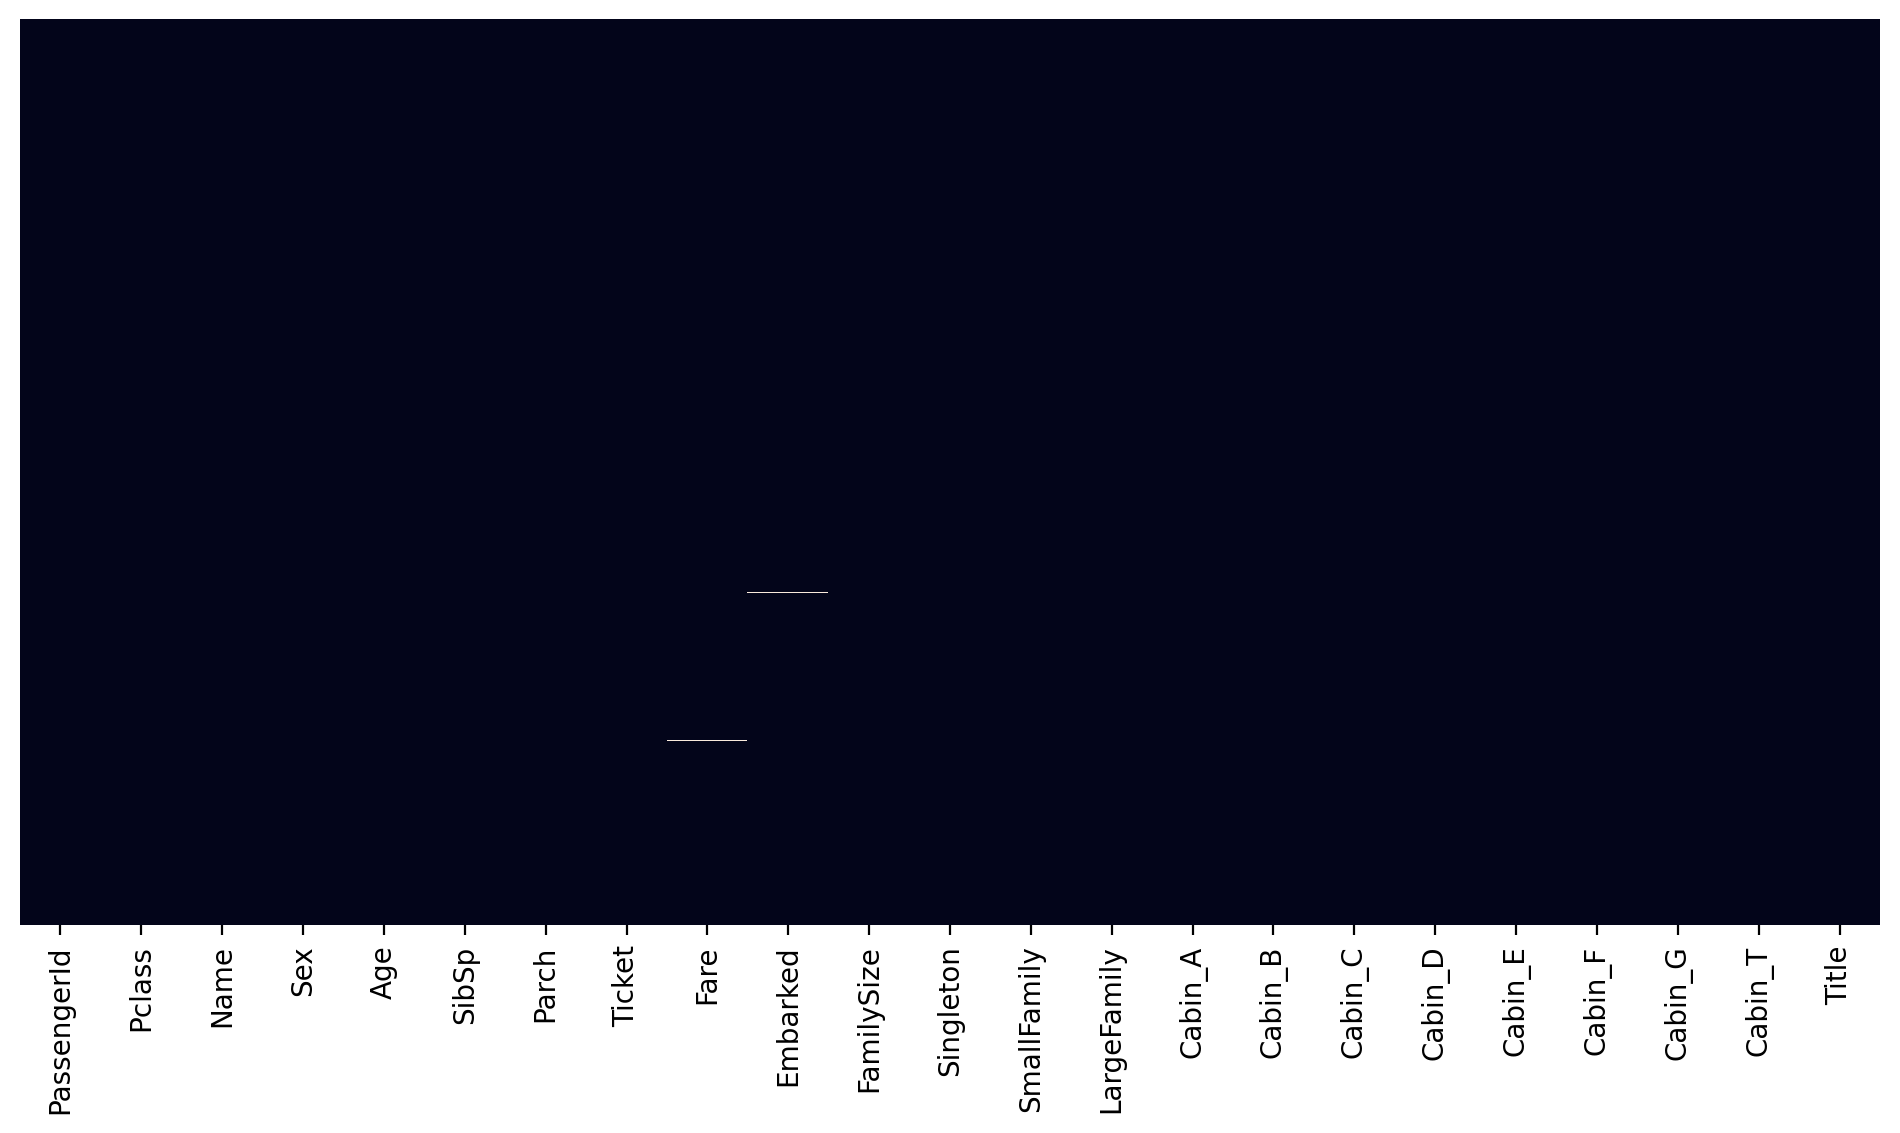

In [30]:
plt.figure(figsize= (12,6),dpi= 200)
sns.heatmap(main_df.isnull(),yticklabels=False,cbar=False)

In [31]:
# creating function for checking percentage of null

def percent_null(df):
    percent_nan=df.isnull().sum()/len(main_df)*100
    percent_nan=percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [32]:
percent_null(main_df)

Fare        0.076394
Title       0.076394
Embarked    0.152788
dtype: float64

In [33]:
df[(df['Age'].isnull()) & (df['Sex']=='male')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Died
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,0
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,1
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S,1
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,840,1,1,"Marechal, Mr. Pierre",male,NaN,0,0,11774,29.7000,C47,C,0
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.5500,NaN,S,1
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,1
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,1


In [34]:
def process_embarked():
    global main_df
    # two missing embarked values - filling them with the most frequent one in the train  set(S)
    main_df.Embarked.fillna('S', inplace=True)
    # dummy encoding 
    main_df_dummies = pd.get_dummies(main_df['Embarked'], prefix='Embarked')
    main_df = pd.concat([main_df, main_df_dummies], axis=1)
    
    main_df.drop('Embarked', axis=1, inplace=True)
    #status('embarked')
    return main_df

In [35]:
main_df = process_embarked()


In [36]:
main_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,FamilySize,...,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Title,Embarked_C,Embarked_Q,Embarked_S
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,2,...,0,0,0,0,0,1,Mr,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,2,...,1,0,0,0,0,0,Mrs,1,0,0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,1,...,0,0,0,0,0,1,Miss,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,2,...,1,0,0,0,0,0,Mrs,0,0,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,1,...,0,0,0,0,0,1,Mr,0,0,1


In [37]:
main_df['Fare']=main_df.groupby('Pclass')['Fare'].transform(lambda val: val.fillna(val.median()))

<AxesSubplot:>

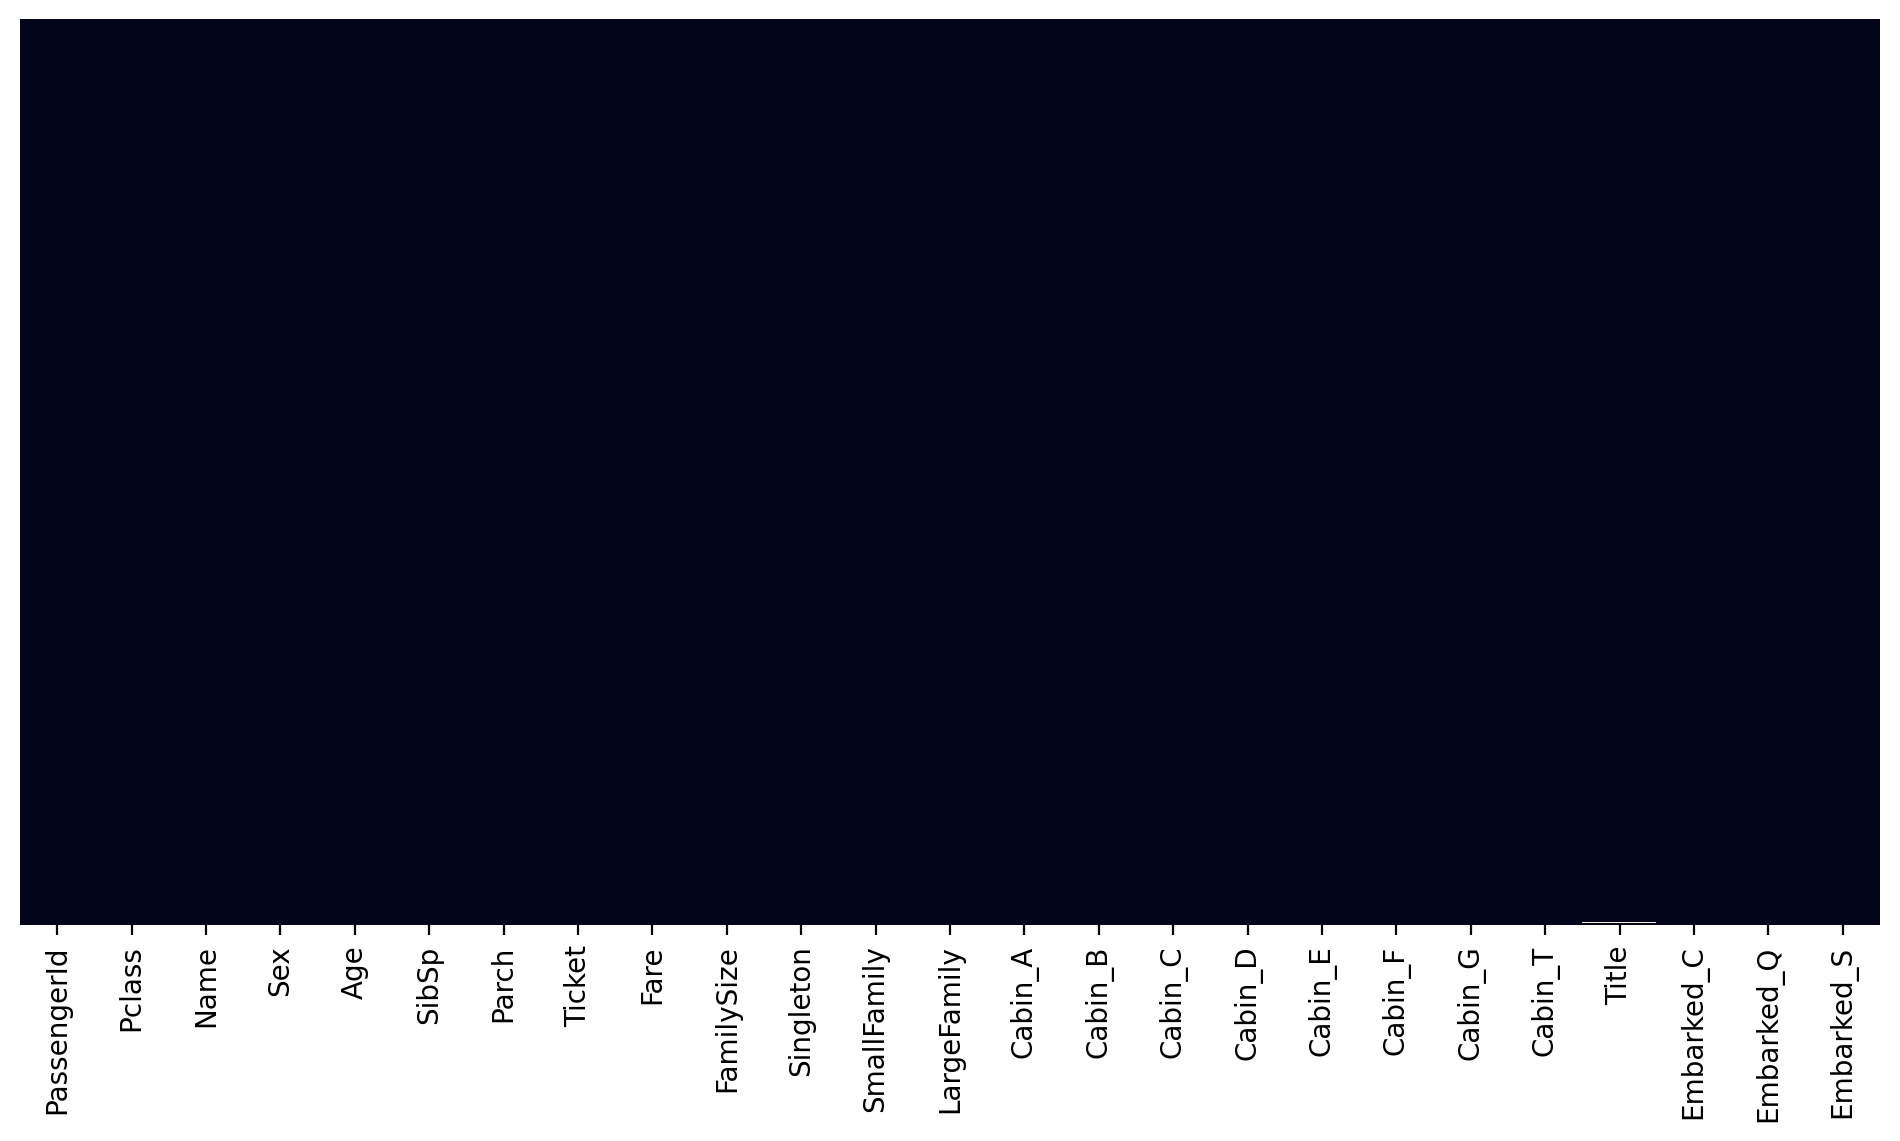

In [38]:
plt.figure(figsize= (12,6),dpi= 200)
sns.heatmap(main_df.isnull(),yticklabels=False,cbar=False)

In [39]:
main_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
FamilySize     0
Singleton      0
SmallFamily    0
LargeFamily    0
Cabin_A        0
Cabin_B        0
Cabin_C        0
Cabin_D        0
Cabin_E        0
Cabin_F        0
Cabin_G        0
Cabin_T        0
Title          1
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [40]:
def process_names():
    global main_df
    # we clean the Name variable
    main_df.drop('Name', axis=1, inplace=True)
    
    # encoding in dummy variable
    titles_dummies = pd.get_dummies(main_df['Title'], prefix='Title')
    main_df = pd.concat([main_df, titles_dummies], axis=1)
    
    # removing the title variable
    main_df.drop('Title', axis=1, inplace=True)
    
#     status('names')
    return main_df

In [41]:
main_df = process_names()


In [42]:
main_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,FamilySize,Singleton,...,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,1,3,male,22.0,1,0,A/5 21171,7.2500,2,0,...,1,0,0,1,0,0,1,0,0,0
1,2,1,female,38.0,1,0,PC 17599,71.2833,2,0,...,0,1,0,0,0,0,0,1,0,0
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,1,1,...,1,0,0,1,0,1,0,0,0,0
3,4,1,female,35.0,1,0,113803,53.1000,2,0,...,0,0,0,1,0,0,0,1,0,0
4,5,3,male,35.0,0,0,373450,8.0500,1,1,...,1,0,0,1,0,0,1,0,0,0


In [43]:
num_df= main_df.select_dtypes(exclude='object')
object_df =main_df.select_dtypes(include='object')

In [44]:
num_df.columns

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize',
       'Singleton', 'SmallFamily', 'LargeFamily', 'Cabin_A', 'Cabin_B',
       'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Title_Officer', 'Title_Royalty'],
      dtype='object')

In [45]:
object_df.columns

Index(['Sex', 'Ticket'], dtype='object')

In [46]:
object_df=object_df.drop('Ticket',axis=1)

In [47]:
object_df= pd.get_dummies(object_df,drop_first=True)

In [48]:
final_df= pd.concat([num_df,object_df],axis=1)

In [49]:
final_df.columns

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize',
       'Singleton', 'SmallFamily', 'LargeFamily', 'Cabin_A', 'Cabin_B',
       'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Title_Officer', 'Title_Royalty', 'Sex_male'],
      dtype='object')

In [50]:
final_df.shape

(1309, 28)

## build and trian model

In [51]:
train_df= final_df.iloc[:891]
train_df.shape

(891, 28)

In [52]:
test_df= final_df.iloc[891:]
test_df.shape

(418, 28)

In [53]:
X_train=train_df
y_train=df['Survived']

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
 #X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [56]:
#X_train=train_df
#y_train=df['Survived']
X_test=test_df

In [57]:

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [58]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)

scaled_X_test = scaler.transform(X_test)

In [59]:
from sklearn.metrics import accuracy_score,confusion_matrix
from scipy.stats import norm
from sklearn.model_selection import RandomizedSearchCV

import xgboost
from xgboost.sklearn import XGBClassifier

In [60]:
#help(RandomForestClassifier)

In [61]:
model = RandomForestClassifier(n_estimators=200,min_samples_leaf=3,max_features=0.5,n_jobs=-1)
model.fit(X_train,y_train)
model.score(X_train,y_train)

0.9225589225589226

In [62]:
model.fit(scaled_X_train,y_train )

RandomForestClassifier(max_features=0.5, min_samples_leaf=3, n_estimators=200,
                       n_jobs=-1)

In [63]:
model.estimator_params

('criterion',
 'max_depth',
 'min_samples_split',
 'min_samples_leaf',
 'min_weight_fraction_leaf',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_impurity_split',
 'random_state',
 'ccp_alpha')

## Final submission of Kaggle

In [64]:
y_pred = model.predict(scaled_X_test)

In [65]:
y_pred.shape


(418,)

In [66]:
pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv('gender_submission.csv')
datasets=pd.concat([sub_df['PassengerId'],pred],axis=1)
datasets.columns=['PassengerId','Survived']
datasets.to_csv('gender_submission.csv',index=False)